In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import Input, layers

print(tf.__version__)


2.3.0


In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# Now separate out a validation set.
val_frac = 0.1
num_val_samples = int(len(train_images)*val_frac)
# choose num_val_samples indices up to the size of train_images, !replace => no repeats
val_idxs = np.random.choice(np.arange(len(train_images)), size=num_val_samples, replace=False)
trn_idxs = np.setdiff1d(np.arange(len(train_images)), val_idxs)
val_images = train_images[val_idxs, :,:,:]
train_images = train_images[trn_idxs, :,:,:]

val_labels = train_labels[val_idxs]
train_labels = train_labels[trn_idxs]

In [3]:
train_labels = train_labels.squeeze()
test_labels = test_labels.squeeze()
val_labels = val_labels.squeeze()

input_shape  = train_images.shape[1:]
train_images = train_images / 255.0
test_images  = test_images  / 255.0
val_images   = val_images   / 255.0
print("Training Images range from {:2.5f} to {:2.5f}".format(np.min(train_images), np.max(train_images)))
print("Test     Images range from {:2.5f} to {:2.5f}".format(np.min(test_images), np.max(test_images)))

Training Images range from 0.00000 to 1.00000
Test     Images range from 0.00000 to 1.00000


In [4]:
print(train_images.shape)
print(len(train_labels))
print(test_images.shape)
print(len(test_labels))
print(val_images.shape)
print(len(val_labels))

(45000, 32, 32, 3)
45000
(10000, 32, 32, 3)
10000
(5000, 32, 32, 3)
5000


(32, 32, 3)

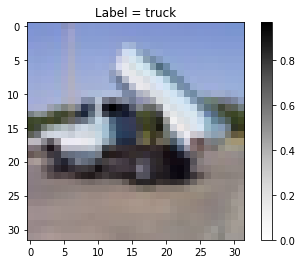

In [5]:
idx = 2401
plt.figure()
plt.imshow(train_images[idx], cmap='Greys')
plt.colorbar()
plt.grid(False)
plt.title("Label = {:}".format(class_names[train_labels[idx]]))
input_shape

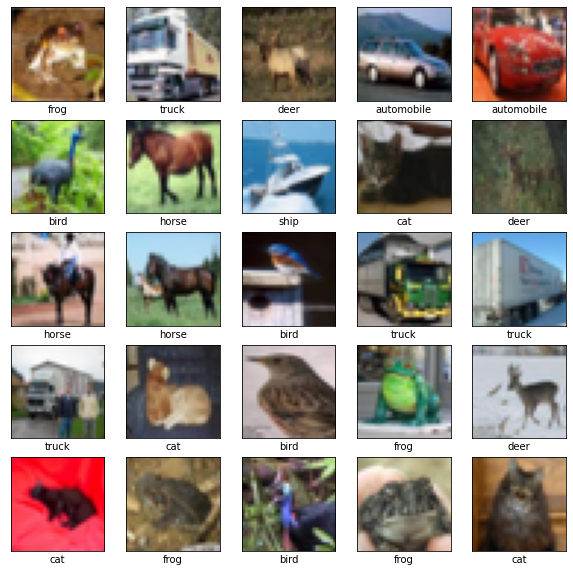

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [7]:
model1 = tf.keras.Sequential([
    Input(shape=input_shape),
    layers.Conv2D(32, kernel_size=(3,3), strides=(2, 2), activation="relu", padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), strides=(2, 2), activation="relu", padding='same'),
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(10)
])
    
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 1,079,242
Trainable params: 1,079,242
Non-trainable params: 0
______________________________________________

In [8]:
# flops = tf.profiler.profile(graph,\
#      options=tf.profiler.ProfileOptionBuilder.float_operation())
# print('FLOP = ', flops.total_float_ops)

In [9]:
train_hist = model1.fit(train_images, train_labels, 
                       validation_data=(val_images, val_labels), # or use `validation_split=0.1`
                       epochs=50)
model1.save('saved_models/volume_conv1')

Epoch 1/50
1407/1407 [==============================] - 9s 7ms/step - loss: 1.4613 - accuracy: 0.4695 - val_loss: 1.2795 - val_accuracy: 0.5436
Epoch 2/50
1407/1407 [==============================] - 9s 7ms/step - loss: 1.1006 - accuracy: 0.6102 - val_loss: 1.1015 - val_accuracy: 0.6078
Epoch 3/50
1407/1407 [==============================] - 9s 7ms/step - loss: 0.9371 - accuracy: 0.6698 - val_loss: 1.0582 - val_accuracy: 0.6170
Epoch 4/50
1407/1407 [==============================] - 9s 7ms/step - loss: 0.8069 - accuracy: 0.7173 - val_loss: 0.9386 - val_accuracy: 0.6750
Epoch 5/50
1407/1407 [==============================] - 10s 7ms/step - loss: 0.6825 - accuracy: 0.7619 - val_loss: 0.9597 - val_accuracy: 0.6788
Epoch 6/50
1407/1407 [==============================] - 9s 7ms/step - loss: 0.5496 - accuracy: 0.8084 - val_loss: 0.9927 - val_accuracy: 0.6786
Epoch 7/50
1407/1407 [==============================] - 9s 7ms/step - loss: 0.4270 - accuracy: 0.8514 - val_loss: 1.0450 - val_accuracy

In [10]:
test_loss, test_acc = model1.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 4.3028 - accuracy: 0.6672

Test accuracy: 0.6672000288963318


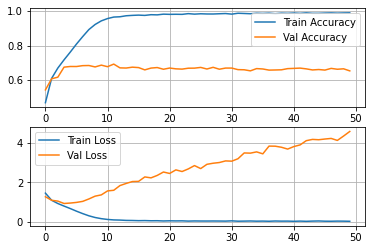

In [11]:
plt.subplot(2,1,1)
plt.plot(train_hist.epoch, train_hist.history['accuracy'], 
        train_hist.epoch, train_hist.history['val_accuracy'])
plt.legend(['Train Accuracy', 'Val Accuracy'])
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(train_hist.epoch, train_hist.history['loss'],
        train_hist.epoch, train_hist.history['val_loss'])
plt.grid(True)
plt.legend(['Train Loss', 'Val Loss'])

(1, 32, 32, 3)


3

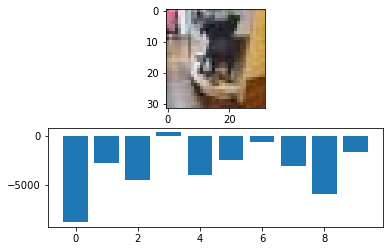

In [12]:
from matplotlib import image

img = image.imread("test_image_dog3.jpeg")
img = tf.expand_dims(img, axis=0)
ex_img = img
idx = 8
#ex_img = train_images[idx:idx+1]  # point out what happens with the indexing here.
print(ex_img.shape)
ex_out = model1.predict(ex_img)    # predict needs shape = (batch,x,y,depth)
plt.subplot(2,1,1)
plt.imshow(ex_img[0,:,:], cmap='Greys')
plt.subplot(2,1,2)
plt.bar(np.arange(10), ex_out[0])
np.argmax(ex_out)

In [13]:
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

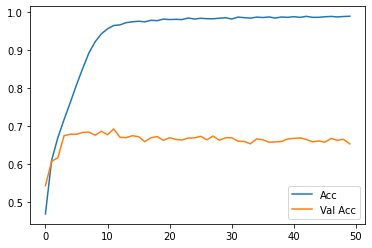

In [14]:
plt.plot(train_hist.epoch, train_hist.history['accuracy'], train_hist.epoch, train_hist.history['val_accuracy'])
plt.legend(['Acc', 'Val Acc'])

In [15]:
model2 = tf.keras.Sequential([
    Input(shape=input_shape),
    layers.DepthwiseConv2D(kernel_size=(3,3), padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), strides=(2,2), activation="relu", padding='same', use_bias=False),
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(10)

])  

model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model2.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
depthwise_conv2d (DepthwiseC (None, 32, 32, 3)         30        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 3)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          1728      
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              4195328   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10250     
Total params: 4,207,336
Trainable params: 4,207,336
Non-trainable params: 0
____________________________________________

In [16]:
train_hist2 = model2.fit(train_images, train_labels, 
                       validation_data=(val_images, val_labels), # or use `validation_split=0.1`
                       epochs=50)
model2.save('saved_models/volume_conv2')

Epoch 1/50
1407/1407 [==============================] - 27s 19ms/step - loss: 1.4804 - accuracy: 0.4679 - val_loss: 1.2610 - val_accuracy: 0.5526
Epoch 2/50
1407/1407 [==============================] - 26s 19ms/step - loss: 1.1457 - accuracy: 0.5958 - val_loss: 1.1872 - val_accuracy: 0.5752
Epoch 3/50
1407/1407 [==============================] - 26s 19ms/step - loss: 0.9496 - accuracy: 0.6670 - val_loss: 1.0955 - val_accuracy: 0.6094
Epoch 4/50
1407/1407 [==============================] - 27s 19ms/step - loss: 0.7739 - accuracy: 0.7321 - val_loss: 1.1089 - val_accuracy: 0.6258
Epoch 5/50
1407/1407 [==============================] - 26s 19ms/step - loss: 0.5901 - accuracy: 0.7985 - val_loss: 1.1461 - val_accuracy: 0.6286
Epoch 6/50
1407/1407 [==============================] - 26s 19ms/step - loss: 0.4049 - accuracy: 0.8641 - val_loss: 1.2389 - val_accuracy: 0.6324
Epoch 7/50
1407/1407 [==============================] - 26s 19ms/step - loss: 0.2570 - accuracy: 0.9154 - val_loss: 1.4532 -

In [18]:
test_loss, test_acc = model2.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 4.7404 - accuracy: 0.5989

Test accuracy: 0.5989000201225281


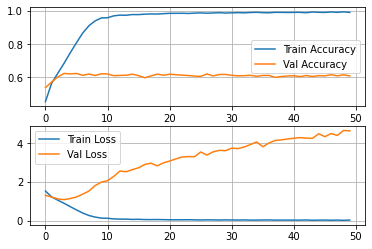

In [19]:
plt.subplot(2,1,1)
plt.plot(train_hist2.epoch, train_hist2.history['accuracy'], 
        train_hist2.epoch, train_hist2.history['val_accuracy'])
plt.legend(['Train Accuracy', 'Val Accuracy'])
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(train_hist2.epoch, train_hist2.history['loss'],
        train_hist2.epoch, train_hist2.history['val_loss'])
plt.grid(True)
plt.legend(['Train Loss', 'Val Loss'])

(1, 32, 32, 3)


7

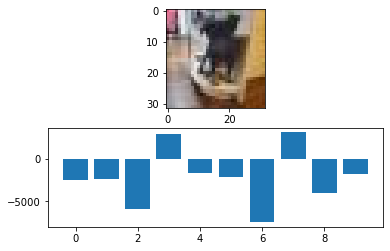

In [30]:
from matplotlib import image

img = image.imread("test_image_dog3.jpeg")
img = tf.expand_dims(img, axis=0)
ex_img = img
idx = 8
#ex_img = train_images[idx:idx+1]  # point out what happens with the indexing here.
print(ex_img.shape)
ex_out = model2.predict(ex_img)    # predict needs shape = (batch,x,y,depth)
plt.subplot(2,1,1)
plt.imshow(ex_img[0,:,:], cmap='Greys')
plt.subplot(2,1,2)
plt.bar(np.arange(10), ex_out[0])
np.argmax(ex_out)

Dense Layer:  
 
    weights = ((#inputs+1) * # outputs)
ops = ((#inputs) * # outputs * 2 (Mul+Add) + #outputs (add-bias)
    Intermediaet storage = # outputs

In [21]:
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

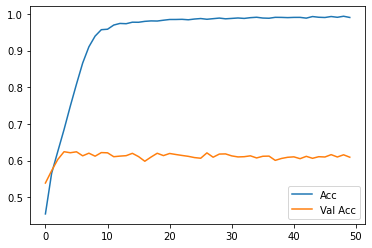

In [22]:
plt.plot(train_hist2.epoch, train_hist2.history['accuracy'], train_hist2.epoch, train_hist2.history['val_accuracy'])
plt.legend(['Acc', 'Val Acc'])
